In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PLGA/0.69 mol acetone/water system analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_plga_awmix = mda.Universe("n6plga_awmix/n6plgaonly_awmix.pdb", "n6plga_awmix/noawmix_n6plga.xtc")

In [6]:
n6_plga_awmix.trajectory

<XTCReader n6plga_awmix/noawmix_n6plga.xtc with 18001 frames of 93 atoms>

In [7]:
len(n6_plga_awmix.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
plga_n6awmix = n6_plga_awmix.select_atoms("resname sPLG PLG tPLG and not type H")

In [9]:
crv_n6plga_awmix = pers_length(plga_n6awmix,6)
crv_n6plga_awmix

array([[ 1.        ,  0.79372441,  0.77581391,  0.87721887,  0.83127955],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        , 37.4650612 , 39.12111674, 28.69132448, 33.7695957 ]])

In [10]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_plga_awmix.trajectory[0:18000]:
    n6_mon1_awmix = n6_plga_awmix.select_atoms("resid 1")
    n6_mon2_awmix = n6_plga_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1_awmix.center_of_mass(), n6_mon2_awmix.center_of_mass(), 
                                                   box=n6_plga_awmix.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [11]:
com_bond

array([[6.11350841, 5.92253141, 5.88769369, ..., 6.64941671, 6.24665586,
        6.17255656]])

In [12]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.81312097809652

In [13]:
np.std(com_bond)

0.7160857118225773

### Radius of Gyration vs. time N = 6 PLGA/0.69 mol acetone/water system

In [14]:
n6plga_rgens_awmix, cor_n6plga_awmix, N6plga_cos_awmix, rgawmix_n6plga = get_rg_pers_poly(plga_n6awmix, n6_plga_awmix, 0, 18000)

In [15]:
n6plga_rgens_awmix[0].shape

(18000,)

In [16]:
cor_n6plga_awmix[3]

array([0., 1., 2., 3., 4.])

In [17]:
N6plga_cos_awmix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.79372441, 0.80113864, 0.78812902, ..., 0.88068499, 0.89074549,
        0.84047689],
       [0.77581391, 0.72465604, 0.78429345, ..., 0.51557396, 0.55596251,
        0.49342697],
       [0.87721887, 0.8364751 , 0.891779  , ..., 0.06447935, 0.16202206,
        0.15423755],
       [0.83127955, 0.80186797, 0.91477604, ..., 0.29453353, 0.41660591,
        0.22250337]])

In [18]:
rgawmix_n6plga

7.418624126975499

In [19]:
np.std(n6plga_rgens_awmix)

1.330377977578941

In [20]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

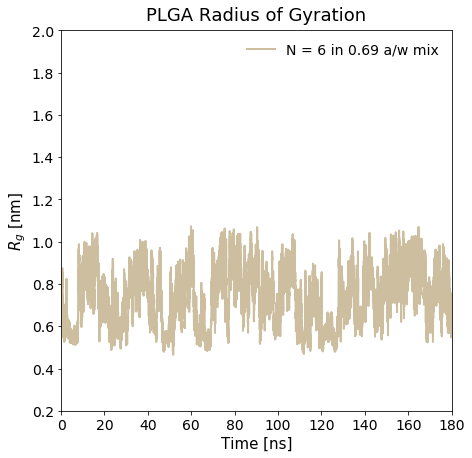

In [21]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_awmix[0]/10,linewidth=2, color='#CCBE9F')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PLGA/0.69 mol acetone/water system

In [22]:
# x values
blen_awmix = cor_n6plga_awmix[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_awmix

array([ 0.        ,  5.81312098, 11.62624196, 17.43936293, 23.25248391])

In [23]:
mk_n6p_awmix = cor_n6plga_awmix[1]/cor_n6plga_awmix[0]
mk_n6p_awmix

array([6.15370316e-17, 7.57718480e-02, 2.78680174e-01, 6.63978989e-01,
       1.02273510e+00])

<ErrorbarContainer object of 3 artists>

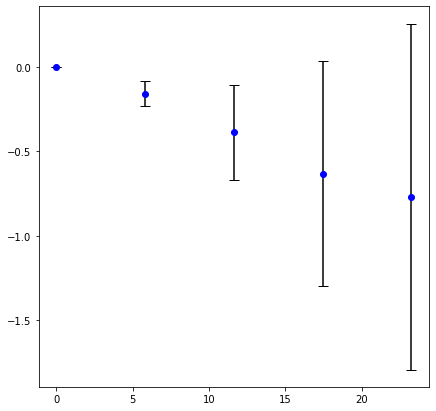

In [24]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [25]:
# All the points give the best fits for N = 6 peg in water
n6_blksplga_awmix , n6plga_lpawmix = bavg_pers_cnt(5, plga_n6awmix, n6_plga_awmix, lb_avg_pn6, 3, 3000 , 18000)

3000
6000
Lp [Angstroms]: 31.8432797092372
Error in Lp from fit [Angstroms], 95% CL : 3.2199590350513367
R2 score: 0.9885156535606743
6000
9000
Lp [Angstroms]: 32.79383322300144
Error in Lp from fit [Angstroms], 95% CL : 4.320702644290852
R2 score: 0.9810196964759127
9000
12000
Lp [Angstroms]: 28.551544466826122
Error in Lp from fit [Angstroms], 95% CL : 2.372315921870793
R2 score: 0.9921271042070545
12000
15000
Lp [Angstroms]: 25.68995875720534
Error in Lp from fit [Angstroms], 95% CL : 3.999270155543878
R2 score: 0.9740729297173453
15000
18000
Lp [Angstroms]: 46.55797586589343
Error in Lp from fit [Angstroms], 95% CL : 0.7652150350657253
R2 score: 0.9996755045682524


In [26]:
n6_blksplga_awmix

{'Avg Radius of gyration': array([7.41416617, 7.66096702, 7.27762832, 7.01705776, 8.12328694]),
 'Avg persistence length': array([31.84327971, 32.79383322, 28.55154447, 25.68995876, 46.55797587])}

In [27]:
n6plga_lpawmix

array([[ 3.18432797e+01,  3.27938332e+01,  2.85515445e+01,
         2.56899588e+01,  4.65579759e+01],
       [ 3.21995904e+00,  4.32070264e+00,  2.37231592e+00,
         3.99927016e+00,  7.65215035e-01],
       [-3.14038004e-02, -3.04935380e-02, -3.50243750e-02,
        -3.89257145e-02, -2.14785970e-02],
       [ 2.76100325e-04,  4.41954351e-04,  2.31880386e-04,
         1.00541474e-03,  3.41214923e-06]])

In [28]:
n6plga_lpawmix[2]

array([-0.0314038 , -0.03049354, -0.03502437, -0.03892571, -0.0214786 ])

In [218]:
np.mean(n6plga_lpawmix[2])

-0.03146520497660921

In [29]:
np.mean(n6plga_lpawmix[3])

0.000391752389803843

In [30]:
def line_fit(slope, x):
    return slope*x 

In [31]:
blen_awmix

array([ 0.        ,  5.81312098, 11.62624196, 17.43936293, 23.25248391])

In [32]:
gg_n6plga_awmix = line_fit(np.mean(n6plga_lpawmix[2]),blen_awmix)

In [33]:
gg_n6plga_awmix

array([-0.        , -0.18291104, -0.36582209, -0.54873313, -0.73164417])

### Block averaged Radius of gyration and persistence length, N = 6 PLGA/0.69 mol acetone/water system

In [34]:
np.mean(n6_blksplga_awmix["Avg persistence length"])

33.08731840443271

In [35]:
np.std(n6_blksplga_awmix["Avg persistence length"])

7.188693250297581

In [36]:
np.mean(n6_blksplga_awmix["Avg Radius of gyration"])

7.4986212421659335

In [37]:
np.std(n6_blksplga_awmix["Avg Radius of gyration"])

0.3753497824108946

Text(0.5, -1.82, '$N_{PLGA}$ = 6: $L_{p}$ = 33.1 $\\AA$ ± 7.19 $\\AA$')

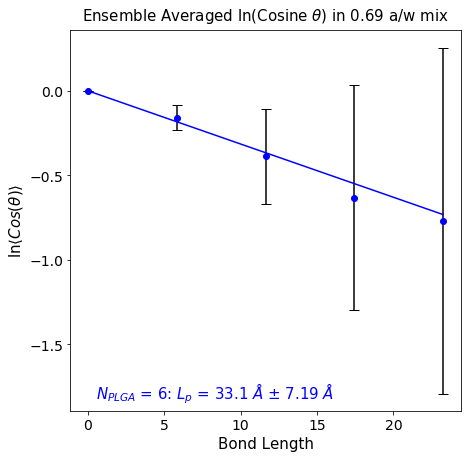

In [252]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_awmix, gg_n6plga_awmix, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.tick_params(labelsize=14)
plt.text(0.5, -1.82,r'$N_{PLGA}$ = 6: $L_{p}$ = 33.1 $\AA$ ± 7.19 $\AA$', fontsize=15, color='b')
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [39]:
rgplga_olig_awmix =  pd.DataFrame(data=n6_blksplga_awmix["Avg Radius of gyration"]
                                  , columns=['$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix'])
rgplga_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix
0,7.414166
1,7.660967
2,7.277628
3,7.017058
4,8.123287


In [40]:
pers_plgat_awmix = pd.DataFrame(data=n6_blksplga_awmix["Avg persistence length"]
                                , columns=[r"$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix "])
pers_plgat_awmix

,$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix
0,31.843280
1,32.793833
2,28.551544
3,25.689959
4,46.557976


### N = 8 PLGA/0.69 mol acetone/water system

In [41]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_plga_awmix = mda.Universe("n8plga_awmix/n8plgaonly_awmix.pdb", "n8plga_awmix/noawmix_n8plga.xtc")

In [42]:
n8_plga_awmix.trajectory

<XTCReader n8plga_awmix/noawmix_n8plga.xtc with 18001 frames of 123 atoms>

In [43]:
len(n8_plga_awmix.trajectory)

18001

In [44]:
#Select the polymer heavy atoms 
plga_n8awmix = n8_plga_awmix.select_atoms("resname sPLG PLG tPLG and not type H")

In [45]:
crv_n8plga_awmix = pers_length(plga_n8awmix,8)
crv_n8plga_awmix

array([[ 1.        ,  0.91620752,  0.87277746,  0.83617727,  0.80723313,
         0.78244539,  0.86059412],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ],
       [ 0.        , 23.62220247, 29.21697982, 33.26137652, 36.17352474,
        38.51497872, 30.61664392]])

In [46]:
com_bond_n8awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n8_plga_awmix.trajectory[0:18000]:
    n8_mon1_awmix = n8_plga_awmix.select_atoms("resid 1")
    n8_mon2_awmix = n8_plga_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1_awmix.center_of_mass(), n8_mon2_awmix.center_of_mass(), 
                                                   box=n8_plga_awmix.trajectory.ts.dimensions)
    com_bond_n8awmix[0, count] = oo_len
    count += 1
    

In [47]:
com_bond

array([[6.11350841, 5.92253141, 5.88769369, ..., 6.64941671, 6.24665586,
        6.17255656]])

In [48]:
np.std(com_bond)

0.7160857118225773

In [49]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.81312097809652

In [50]:
np.mean(com_bond_n8awmix)

5.86235260226015

In [51]:
np.std(com_bond_n8awmix)

0.7015393475726607

### Radius of Gyration vs. time N = 8 PLGA/0.69 mol acetone/water system

In [52]:
n8plga_rgens_awmix, cor_n8plga_awmix, N8plga_cos_awmix, rgawmix_n8plga = get_rg_pers_poly(plga_n8awmix, n8_plga_awmix, 0, 18000)

In [53]:
n8plga_rgens_awmix[0].shape

(18000,)

In [54]:
cor_n8plga_awmix[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [55]:
N8plga_cos_awmix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.91620752, 0.90811913, 0.94059688, ..., 0.93247873, 0.94174337,
        0.93826385],
       [0.87277746, 0.89574851, 0.92347195, ..., 0.89279404, 0.88550031,
        0.84211876],
       ...,
       [0.80723313, 0.78485372, 0.81547264, ..., 0.82241204, 0.86770149,
        0.77264412],
       [0.78244539, 0.6514082 , 0.70318369, ..., 0.79396484, 0.82460685,
        0.87026422],
       [0.86059412, 0.56191988, 0.51402012, ..., 0.93401012, 0.86926478,
        0.96823756]])

In [56]:
rgawmix_n8plga

8.750508082206261

In [57]:
np.std(n8plga_rgens_awmix)

1.776776511503046

(0.2, 2)

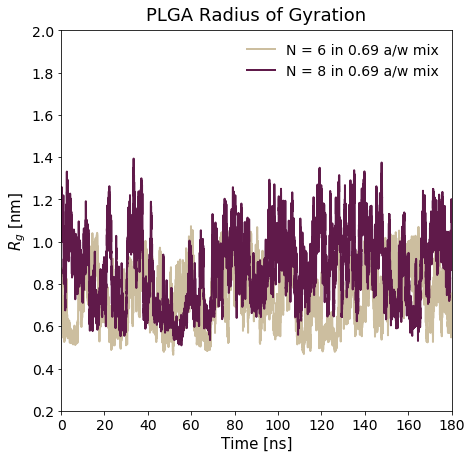

In [253]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_awmix[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_awmix[0]/10,linewidth=2, color='#601A4A')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PLGA/0.69 mol acetone/water system

In [59]:
# x values
blen_n8awmix = cor_n8plga_awmix[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n8awmix

array([ 0.        ,  5.81312098, 11.62624196, 17.43936293, 23.25248391,
       29.06560489, 34.87872587])

In [60]:
mk_n8p_awmix = cor_n8plga_awmix[1]/cor_n8plga_awmix[0]
mk_n8p_awmix

array([4.19508282e-17, 6.02324173e-02, 2.15240405e-01, 4.50010376e-01,
       8.04534020e-01, 1.47698082e+00, 1.93262669e+00])

<ErrorbarContainer object of 3 artists>

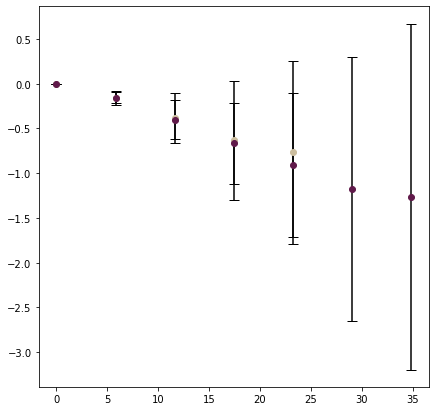

In [61]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [62]:
# All the points give the best fits for N = 6 peg in water
n8_blksplga_awmix , n8plga_lpawmix = bavg_pers_cnt(5, plga_n8awmix, n8_plga_awmix, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.143704573731174
Error in Lp from fit [Angstroms], 95% CL : 2.9846166343580363
R2 score: 0.9299931285383647
6000
9000
Lp [Angstroms]: 26.608496995388638
Error in Lp from fit [Angstroms], 95% CL : 2.4102456756897648
R2 score: 0.975758415728774
9000
12000
Lp [Angstroms]: 33.52385397340196
Error in Lp from fit [Angstroms], 95% CL : 1.4812299878020732
R2 score: 0.9937208083198039
12000
15000
Lp [Angstroms]: 36.49261517385925
Error in Lp from fit [Angstroms], 95% CL : 2.1542562373126346
R2 score: 0.9890486985949114
15000
18000
Lp [Angstroms]: 29.377309849330263
Error in Lp from fit [Angstroms], 95% CL : 1.4127268375882827
R2 score: 0.9925195234255703


In [63]:
n8_blksplga_awmix

{'Avg Radius of gyration': array([7.81594126, 8.57635653, 9.19711751, 9.76933894, 8.66267636]),
 'Avg persistence length': array([18.14370457, 26.608497  , 33.52385397, 36.49261517, 29.37730985])}

In [64]:
n8plga_lpawmix

array([[ 1.81437046e+01,  2.66084970e+01,  3.35238540e+01,
         3.64926152e+01,  2.93773098e+01],
       [ 2.98461663e+00,  2.41024568e+00,  1.48122999e+00,
         2.15425624e+00,  1.41272684e+00],
       [-5.51155359e-02, -3.75819799e-02, -2.98295059e-02,
        -2.74028045e-02, -3.40398765e-02],
       [ 1.19990775e-02,  1.69167083e-03,  2.53573486e-04,
         3.81987700e-04,  3.91149614e-04]])

In [65]:
n8plga_lpawmix[2]

array([-0.05511554, -0.03758198, -0.02982951, -0.0274028 , -0.03403988])

In [66]:
np.mean(n8plga_lpawmix[3])

0.0029434918173598464

In [67]:
blen_n8awmix

array([ 0.        ,  5.81312098, 11.62624196, 17.43936293, 23.25248391,
       29.06560489, 34.87872587])

In [68]:
gg_n8plga_awmix = line_fit(np.mean(n8plga_lpawmix[2]),blen_n8awmix)

In [69]:
gg_n6plga_n8awmix = line_fit(np.mean(n6plga_lpawmix[2]),blen_n8awmix)

In [70]:
gg_n8plga_awmix

array([-0.        , -0.21388763, -0.42777526, -0.64166288, -0.85555051,
       -1.06943814, -1.28332577])

### Block averaged Radius of gyration and persistence length, N = 8 PLGA/0.69 mol acetone/water system

In [71]:
np.mean(n8_blksplga_awmix["Avg persistence length"])

28.829196113142256

In [72]:
np.std(n8_blksplga_awmix["Avg persistence length"])

6.327392303362804

In [73]:
np.mean(n8_blksplga_awmix["Avg Radius of gyration"])

8.804286119013275

In [74]:
np.std(n8_blksplga_awmix["Avg Radius of gyration"])

0.6533719045739719

Text(0.5, -6.54, '$N_{PLGA}$ = 8: $L_{p}$ = 28.8 $\\AA$ ± 6.33 $\\AA$')

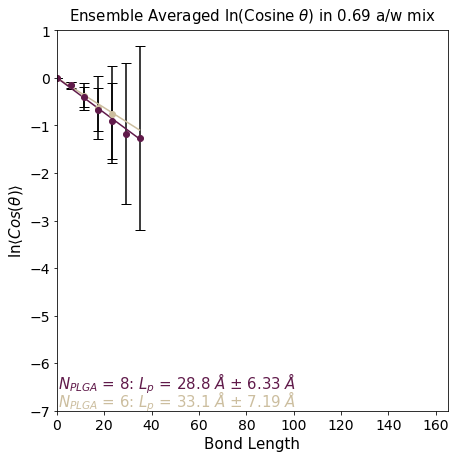

In [75]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8awmix, gg_n6plga_n8awmix, color='#CCBE9F')
plt.plot(blen_n8awmix, gg_n8plga_awmix, color='#601A4A')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 33.1 $\AA$ ± 7.19 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 28.8 $\AA$ ± 6.33 $\AA$', fontsize=15, color='#601A4A')

In [76]:
rgplga_olig_awmix[r"$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix"] = n8_blksplga_awmix["Avg Radius of gyration"]
rgplga_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix
0,7.414166,7.815941
1,7.660967,8.576357
2,7.277628,9.197118
3,7.017058,9.769339
4,8.123287,8.662676


In [77]:
pers_plgat_awmix[r"$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix"] = n8_blksplga_awmix["Avg persistence length"]
pers_plgat_awmix

,$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix
0,31.843280,18.143705
1,32.793833,26.608497
2,28.551544,33.523854
3,25.689959,36.492615
4,46.557976,29.377310


### N = 10 PLGA/0.69 mol acetone/water system

In [78]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_plga_awmix = mda.Universe("n10plga_awmix/n10plgaonly_awmix.pdb", "n10plga_awmix/noawmix_n10plga.xtc")

In [79]:
n10_plga_awmix.trajectory

<XTCReader n10plga_awmix/noawmix_n10plga.xtc with 18001 frames of 153 atoms>

In [80]:
len(n10_plga_awmix.trajectory)

18001

In [81]:
#Select the polymer heavy atoms 
plga_n10awmix = n10_plga_awmix.select_atoms("resname sPLG PLG tPLG and not type H")

In [82]:
crv_n10plga_awmix = pers_length(plga_n10awmix,10)
crv_n10plga_awmix

array([[ 1.        ,  0.91444136,  0.8992429 ,  0.80897815,  0.79537051,
         0.68667933,  0.718151  ,  0.6078133 ,  0.79288135],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ],
       [ 0.        , 23.87348321, 25.94127228, 36.00378668, 37.30973511,
        46.63217978, 44.09796656, 52.56844219, 37.54440073]])

In [83]:
com_bond_n10awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n10_plga_awmix.trajectory[0:18000]:
    n10_mon1_awmix = n10_plga_awmix.select_atoms("resid 1")
    n10_mon2_awmix = n10_plga_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1_awmix.center_of_mass(), n10_mon2_awmix.center_of_mass(), 
                                                   box=n10_plga_awmix.trajectory.ts.dimensions)
    com_bond_n10awmix[0, count] = oo_len
    count += 1
    

In [84]:
com_bond

array([[6.11350841, 5.92253141, 5.88769369, ..., 6.64941671, 6.24665586,
        6.17255656]])

In [85]:
np.std(com_bond)

0.7160857118225773

In [86]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.81312097809652

In [87]:
np.mean(com_bond_n10awmix)

5.735376465072906

In [88]:
np.std(com_bond_n10awmix)

0.7095014921901286

### Radius of Gyration vs. time N = 10 PLGA/0.69 mol acetone/water system

In [89]:
n10plga_rgens_awmix, cor_n10plga_awmix, N10plga_cos_awmix, rgawmix_n10plga = get_rg_pers_poly(plga_n10awmix,
                                                                                              n10_plga_awmix, 0, 18000)

In [90]:
n10plga_rgens_awmix[0].shape

(18000,)

In [91]:
cor_n10plga_awmix[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [92]:
N10plga_cos_awmix

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.91444136,  0.91643177,  0.90181651, ...,  0.88579193,
         0.87473152,  0.86801401],
       [ 0.8992429 ,  0.88328607,  0.83933544, ...,  0.6955911 ,
         0.6684385 ,  0.67472731],
       ...,
       [ 0.718151  ,  0.68734401,  0.60497106, ...,  0.38428703,
         0.35420479,  0.33635766],
       [ 0.6078133 ,  0.67236443,  0.68663749, ...,  0.0764801 ,
         0.05052257, -0.00707002],
       [ 0.79288135,  0.75748722,  0.87577516, ..., -0.66977966,
        -0.6586139 , -0.65861945]])

In [93]:
rgawmix_n10plga

9.516664037274733

In [94]:
np.std(n10plga_rgens_awmix)

2.43645537844452

(0.2, 2)

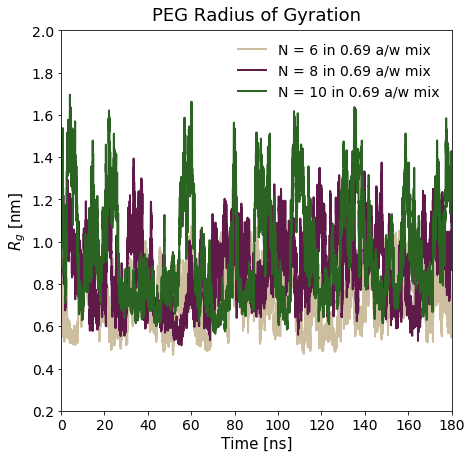

In [95]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_awmix[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_awmix[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_awmix[0]/10,linewidth=2, color='#2B6322')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 10 PLGA/0.69 mol acetone/water system

In [96]:
# x values
blen_n10awmix = cor_n10plga_awmix[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n10awmix

array([ 0.        ,  5.81312098, 11.62624196, 17.43936293, 23.25248391,
       29.06560489, 34.87872587, 40.69184685, 46.50496782])

In [97]:
mk_n10p_awmix = cor_n10plga_awmix[1]/cor_n10plga_awmix[0]
mk_n10p_awmix

array([4.34108403e-17, 5.98295679e-02, 2.01585348e-01, 4.20248937e-01,
       7.13892852e-01, 1.00625701e+00, 1.28056391e+00, 1.71932036e+00,
       2.20984083e+00])

<ErrorbarContainer object of 3 artists>

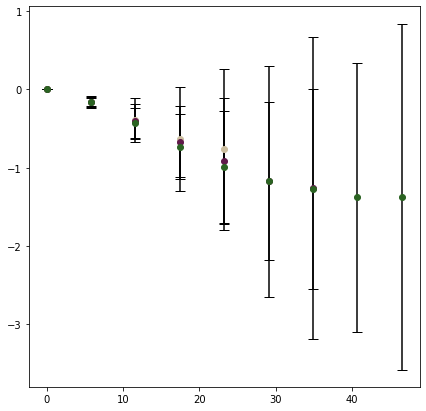

In [98]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10plga_awmix[0]), yerr=mk_n10p_awmix, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [99]:
# All the points give the best fits for N = 6 peg in water
n10_blksplga_awmix, n10plga_lpawmix = bavg_pers_cnt(5, plga_n10awmix, n10_plga_awmix, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.415307212971733
Error in Lp from fit [Angstroms], 95% CL : 1.2835262626510573
R2 score: 0.9748625374078841
6000
9000
Lp [Angstroms]: 16.321849217987168
Error in Lp from fit [Angstroms], 95% CL : 1.7031792227275502
R2 score: 0.9482587073965846
9000
12000
Lp [Angstroms]: 29.365547786417782
Error in Lp from fit [Angstroms], 95% CL : 2.1327237471196385
R2 score: 0.972534423182722
12000
15000
Lp [Angstroms]: 23.457534962906287
Error in Lp from fit [Angstroms], 95% CL : 1.71599843524739
R2 score: 0.972368483478434
15000
18000
Lp [Angstroms]: 32.1760438555503
Error in Lp from fit [Angstroms], 95% CL : 2.9283526554305803
R2 score: 0.9464648954871866


In [100]:
n10_blksplga_awmix

{'Avg Radius of gyration': array([ 8.51791912,  8.26051643, 10.28855216,  9.5988038 ,  9.88656032]),
 'Avg persistence length': array([18.41530721, 16.32184922, 29.36554779, 23.45753496, 32.17604386])}

In [101]:
n10plga_lpawmix

array([[ 1.84153072e+01,  1.63218492e+01,  2.93655478e+01,
         2.34575350e+01,  3.21760439e+01],
       [ 1.28352626e+00,  1.70317922e+00,  2.13272375e+00,
         1.71599844e+00,  2.92835266e+00],
       [-5.43026510e-02, -6.12675676e-02, -3.40535108e-02,
        -4.26302253e-02, -3.10790228e-02],
       [ 6.02844660e-03,  1.72010528e-02,  2.57411862e-03,
         4.09275793e-03,  3.36688239e-03]])

In [102]:
n10plga_lpawmix[2]

array([-0.05430265, -0.06126757, -0.03405351, -0.04263023, -0.03107902])

In [217]:
np.mean(n10plga_lpawmix[2])

-0.04466659549040999

In [103]:
np.mean(n10plga_lpawmix[3])

0.006652651661083383

In [104]:
blen_n10awmix

array([ 0.        ,  5.81312098, 11.62624196, 17.43936293, 23.25248391,
       29.06560489, 34.87872587, 40.69184685, 46.50496782])

In [105]:
gg_n10plga_awmix = line_fit(np.mean(n10plga_lpawmix[2]),blen_n10awmix)

In [106]:
gg_n6plga_n10awmix = line_fit(np.mean(n6plga_lpawmix[2]),blen_n10awmix)

In [107]:
gg_n8plga_n10awmix = line_fit(np.mean(n8plga_lpawmix[2]),blen_n10awmix)

In [108]:
gg_n10plga_awmix

array([-0.        , -0.25965232, -0.51930465, -0.77895697, -1.03860929,
       -1.29826162, -1.55791394, -1.81756626, -2.07721859])

### Block averaged Radius of gyration and persistence length, N = 10 PLGA/0.69 mol acetone/water system

In [109]:
np.mean(n10_blksplga_awmix["Avg persistence length"])

23.94725660716665

In [110]:
np.std(n10_blksplga_awmix["Avg persistence length"])

6.100163081788151

In [111]:
np.mean(n10_blksplga_awmix["Avg Radius of gyration"])

9.310470363658393

In [112]:
np.std(n10_blksplga_awmix["Avg Radius of gyration"])

0.7876802070768795

Text(0.5, -6.14, '$N_{PLGA}$ = 10: $L_{p}$ = 23.9 $\\AA$ ± 6.10 $\\AA$')

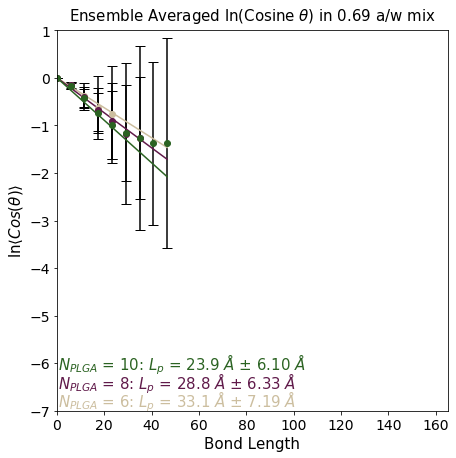

In [113]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10plga_awmix[0]), yerr=mk_n10p_awmix, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10awmix, gg_n6plga_n10awmix, color='#CCBE9F')
plt.plot(blen_n10awmix, gg_n8plga_n10awmix, color='#601A4A')
plt.plot(blen_n10awmix, gg_n10plga_awmix, color='#2B6322')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 33.1 $\AA$ ± 7.19 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 28.8 $\AA$ ± 6.33 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 23.9 $\AA$ ± 6.10 $\AA$', fontsize=15, color='#2B6322')

In [114]:
rgplga_olig_awmix[r"$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix"] = n10_blksplga_awmix["Avg Radius of gyration"]
rgplga_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix
0,7.414166,7.815941,8.517919
1,7.660967,8.576357,8.260516
2,7.277628,9.197118,10.288552
3,7.017058,9.769339,9.598804
4,8.123287,8.662676,9.886560


In [115]:
pers_plgat_awmix[r"$L_{p}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix"] = n10_blksplga_awmix["Avg persistence length"]
pers_plgat_awmix

,$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix
0,31.843280,18.143705,18.415307
1,32.793833,26.608497,16.321849
2,28.551544,33.523854,29.365548
3,25.689959,36.492615,23.457535
4,46.557976,29.377310,32.176044


### N = 20 PLGA/0.69 mol acetone/water system

In [116]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_plga_awmix = mda.Universe("n20plga_awmix/n20plgaonly_awmix.pdb", "n20plga_awmix/noawmix_n20plga.xtc")

In [117]:
n20_plga_awmix.trajectory

<XTCReader n20plga_awmix/noawmix_n20plga.xtc with 18001 frames of 303 atoms>

In [118]:
len(n20_plga_awmix.trajectory)

18001

In [119]:
#Select the polymer heavy atoms 
plga_n20awmix = n20_plga_awmix.select_atoms("resname sPLG PLG tPLG and not type H")

In [120]:
crv_n20plga_awmix = pers_length(plga_n20awmix,20)
crv_n20plga_awmix

array([[ 1.        ,  0.87010134,  0.71895222,  0.61264014,  0.64205624,
         0.63860173,  0.62662734,  0.62311359,  0.67738618,  0.68702678,
         0.67332796,  0.63767509,  0.58369175,  0.59979695,  0.77939777,
         0.74776654,  0.80170164,  0.79500914,  0.93515744],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        , 29.52958207, 44.03195848, 52.21935228, 50.05468036,
        50.31236685, 51.19827001, 51.45613619, 47.36027388, 46.60478871,
        47.675559  , 50.38132584, 54.289378  , 53.14464318, 38.79453091,
        41.60272302, 36.70709477, 37.34388065, 20.74640459]])

In [121]:
com_bond_n20awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n20_plga_awmix.trajectory[0:18000]:
    n20_mon1_awmix = n20_plga_awmix.select_atoms("resid 1")
    n20_mon2_awmix = n20_plga_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1_awmix.center_of_mass(), n20_mon2_awmix.center_of_mass(), 
                                                   box=n20_plga_awmix.trajectory.ts.dimensions)
    com_bond_n20awmix[0, count] = oo_len
    count += 1
    

In [122]:
com_bond

array([[6.11350841, 5.92253141, 5.88769369, ..., 6.64941671, 6.24665586,
        6.17255656]])

In [123]:
np.std(com_bond)

0.7160857118225773

In [124]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.81312097809652

In [125]:
np.mean(com_bond_n20awmix)

5.772925385037166

In [126]:
np.std(com_bond_n20awmix)

0.7076540197731143

### Radius of Gyration vs. time N = 20 PLGA/0.69 mol acetone/water system

In [127]:
n20plga_rgens_awmix, cor_n20plga_awmix, N20plga_cos_awmix, rgawmix_n20plga = get_rg_pers_poly(plga_n20awmix
                                                                                              , n20_plga_awmix, 0, 18000)

In [128]:
n20plga_rgens_awmix[0].shape

(18000,)

In [129]:
cor_n20plga_awmix[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [130]:
N20plga_cos_awmix

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.87010134,  0.87311681,  0.86368993, ...,  0.90155644,
         0.89083013,  0.88702993],
       [ 0.71895222,  0.71583336,  0.69388661, ...,  0.77292948,
         0.75514431,  0.7654575 ],
       ...,
       [ 0.80170164,  0.76937407,  0.73717722, ..., -0.25139413,
        -0.12357828, -0.06212151],
       [ 0.79500914,  0.71330341,  0.66405095, ..., -0.45488261,
        -0.24869038, -0.16482097],
       [ 0.93515744,  0.57200895,  0.36282336, ..., -0.4271038 ,
         0.16194728,  0.15311492]])

In [131]:
rgawmix_n20plga

13.216714653022674

In [132]:
np.std(n20plga_rgens_awmix)

3.1634625199013535

(0.2, 2)

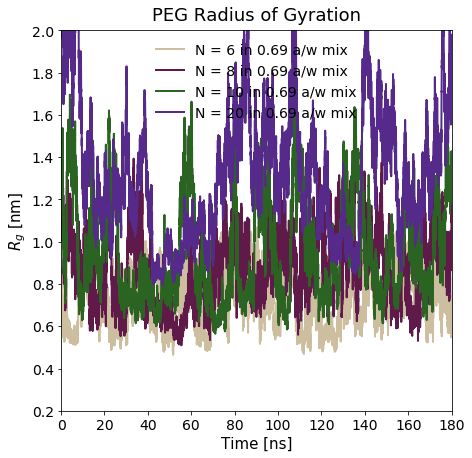

In [133]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_awmix[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_awmix[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_awmix[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_awmix[0]/10,linewidth=2, color='#562A8B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix', 'N = 20 in 0.69 a/w mix']
           , frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 20 PLGA/0.69 mol acetone/water system

In [134]:
# x values
blen_n20awmix = cor_n20plga_awmix[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n20awmix

array([  0.        ,   5.81312098,  11.62624196,  17.43936293,
        23.25248391,  29.06560489,  34.87872587,  40.69184685,
        46.50496782,  52.3180888 ,  58.13120978,  63.94433076,
        69.75745174,  75.57057272,  81.38369369,  87.19681467,
        93.00993565,  98.82305663, 104.63617761])

In [135]:
mk_n20p_awmix = cor_n20plga_awmix[1]/cor_n20plga_awmix[0]
mk_n20p_awmix

array([2.39263866e-17, 3.41779126e-02, 1.01912277e-01, 1.84325960e-01,
       2.78023792e-01, 3.89018742e-01, 5.05492707e-01, 5.97642555e-01,
       6.78684416e-01, 7.05586823e-01, 6.86333175e-01, 7.36591452e-01,
       7.51669167e-01, 8.61779558e-01, 9.33623075e-01, 1.17100982e+00,
       1.37503216e+00, 1.72385376e+00, 2.48932575e+00])

<ErrorbarContainer object of 3 artists>

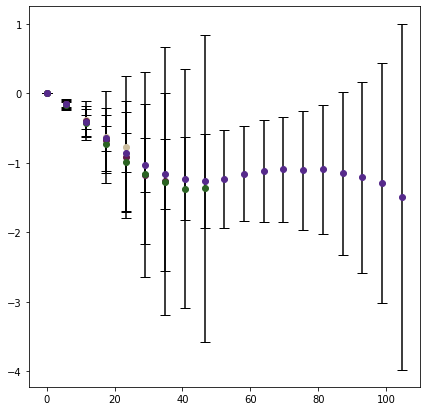

In [136]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10plga_awmix[0]), yerr=mk_n10p_awmix, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20plga_awmix[0]), yerr=mk_n20p_awmix, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [137]:
# All the points give the best fits for N = 6 peg in water
n20_blksplga_awmix , n20plga_lpawmix = bavg_pers_cnt(5, plga_n20awmix, n20_plga_awmix, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 28.177639214069544
Error in Lp from fit [Angstroms]: 0.0030122647917649216
6000
9000
Lp [Angstroms]: 31.988146985425644
Error in Lp from fit [Angstroms], 95% CL : 0.20814073661360505
R2 score: 0.996095335431744
9000
12000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 35.00453343744715
Error in Lp from fit [Angstroms]: 0.0019543479181981216
12000
15000
Lp [Angstroms]: 26.99977912383943
Error in Lp from fit [Angstroms], 95% CL : 0.2407503268952468
R2 score: 0.9925710906725437
15000
18000
Lp [Angstroms]: 26.221392648151852
Error in Lp from fit [Angstroms], 95% CL : 0.3128532309606888
R2 score: 0.9877670878042318


In [138]:
n20_blksplga_awmix

{'Avg Radius of gyration': array([10.74844324, 13.25298254, 14.03763861, 12.72260855, 13.6826286 ]),
 'Avg persistence length': array([28.17763921, 31.98814699, 35.00453344, 26.99977912, 26.22139265])}

In [139]:
n20plga_lpawmix

array([[ 2.81776392e+01,  3.19881470e+01,  3.50045334e+01,
         2.69997791e+01,  2.62213926e+01],
       [ 3.01226479e-03,  2.08140737e-01,  1.95434792e-03,
         2.40750327e-01,  3.12853231e-01],
       [ 0.00000000e+00, -3.12615795e-02,  0.00000000e+00,
        -3.70373400e-02, -3.81367997e-02],
       [ 0.00000000e+00,  2.72257013e-04,  0.00000000e+00,
         7.17652427e-04,  1.36232117e-03]])

In [223]:
n20plga_lpawmix[2][4]

-0.03813679972754927

In [225]:
np.array([n20plga_lpawmix[2][3],n20plga_lpawmix[2][1],n20plga_lpawmix[2][3]])

array([-0.03703734, -0.03126158, -0.03703734])

In [227]:
n20_avg_mslope = np.mean(np.array([n20plga_lpawmix[2][3],n20plga_lpawmix[2][1],n20plga_lpawmix[2][3]]))

In [228]:
np.mean(n20plga_lpawmix[2])

-0.021287143850173048

In [229]:
np.mean(n20plga_lpawmix[3])

0.00047044612223520147

In [230]:
blen_n20awmix

array([  0.        ,   5.81312098,  11.62624196,  17.43936293,
        23.25248391,  29.06560489,  34.87872587,  40.69184685,
        46.50496782,  52.3180888 ,  58.13120978,  63.94433076,
        69.75745174,  75.57057272,  81.38369369,  87.19681467,
        93.00993565,  98.82305663, 104.63617761])

In [231]:
gg_n20plga_awmix = line_fit(n20_avg_mslope,blen_n20awmix)

In [144]:
gg_n6plga_n20awmix = line_fit(np.mean(n6plga_lpawmix[2]),blen_n20awmix)

In [145]:
gg_n8plga_n20awmix = line_fit(np.mean(n8plga_lpawmix[2]),blen_n20awmix)

In [146]:
gg_n10plga_n20awmix = line_fit(np.mean(n10plga_lpawmix[2]),blen_n20awmix)

In [147]:
gg_n20plga_awmix

array([-0.        , -0.12374474, -0.24748948, -0.37123423, -0.49497897,
       -0.61872371, -0.74246845, -0.8662132 , -0.98995794, -1.11370268,
       -1.23744742, -1.36119217, -1.48493691, -1.60868165, -1.73242639,
       -1.85617114, -1.97991588, -2.10366062, -2.22740536])

### Block averaged Radius of gyration and persistence length, N = 20 PLGA/0.69 mol acetone/water system

In [148]:
np.mean(n20_blksplga_awmix["Avg persistence length"])

29.678298281786727

In [149]:
np.std(n20_blksplga_awmix["Avg persistence length"])

3.319060741955906

In [150]:
np.mean(n20_blksplga_awmix["Avg Radius of gyration"])

12.888860308290035

In [151]:
np.std(n20_blksplga_awmix["Avg Radius of gyration"])

1.1568378932984031

Text(0.5, -5.7, '$N_{PLGA}$ = 20: $L_{p}$ = 29.7 $\\AA$ ± 3.32 $\\AA$')

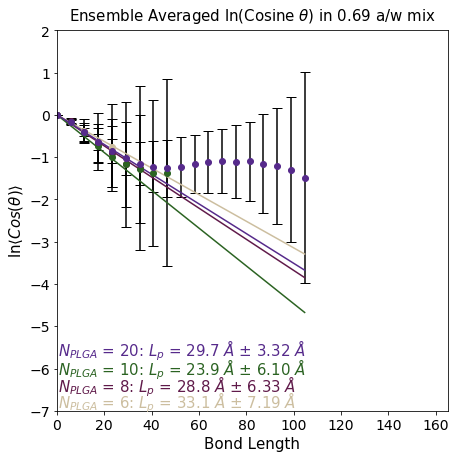

In [232]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10plga_awmix[0]), yerr=mk_n10p_awmix, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20plga_awmix[0]), yerr=mk_n20p_awmix, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20awmix, gg_n6plga_n20awmix, color='#CCBE9F')
plt.plot(blen_n20awmix, gg_n8plga_n20awmix, color='#601A4A')
plt.plot(blen_n20awmix, gg_n10plga_n20awmix, color='#2B6322')
plt.plot(blen_n20awmix, gg_n20plga_awmix, color='#562A8B')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,2)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 33.1 $\AA$ ± 7.19 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 28.8 $\AA$ ± 6.33 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 23.9 $\AA$ ± 6.10 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 29.7 $\AA$ ± 3.32 $\AA$', fontsize=15, color='#562A8B')

In [153]:
rgplga_olig_awmix[r"$R_{g}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix"] = n20_blksplga_awmix["Avg Radius of gyration"]
rgplga_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix
0,7.414166,7.815941,8.517919,10.748443
1,7.660967,8.576357,8.260516,13.252983
2,7.277628,9.197118,10.288552,14.037639
3,7.017058,9.769339,9.598804,12.722609
4,8.123287,8.662676,9.886560,13.682629


In [154]:
pers_plgat_awmix[r"$L_{p}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix"] = n20_blksplga_awmix["Avg persistence length"]
pers_plgat_awmix

,$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix
0,31.843280,18.143705,18.415307,28.177639
1,32.793833,26.608497,16.321849,31.988147
2,28.551544,33.523854,29.365548,35.004533
3,25.689959,36.492615,23.457535,26.999779
4,46.557976,29.377310,32.176044,26.221393


### N = 30 PLGA/0.69 mol acetone/water system

In [155]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_plga_awmix = mda.Universe("n30plga_awmix/n30plgaonly_awmix.pdb", "n30plga_awmix/noawmix_n30plga.xtc")

In [156]:
n30_plga_awmix.trajectory

<XTCReader n30plga_awmix/noawmix_n30plga.xtc with 18001 frames of 453 atoms>

In [157]:
len(n30_plga_awmix.trajectory)

18001

In [158]:
#Select the polymer heavy atoms 
plga_n30awmix = n30_plga_awmix.select_atoms("resname sPLG PLG tPLG and not type H")

In [159]:
crv_n30plga_awmix = pers_length(plga_n30awmix,30)
crv_n30plga_awmix

array([[ 1.        ,  0.85323332,  0.66982722,  0.58186492,  0.54476169,
         0.50084043,  0.47153236,  0.47338197,  0.48328097,  0.5170664 ,
         0.57380494,  0.62393528,  0.5948042 ,  0.56040602,  0.52518071,
         0.5015313 ,  0.51336243,  0.58844824,  0.58335525,  0.60401705,
         0.67994938,  0.70950662,  0.69470191,  0.74678033,  0.79500988,
         0.7548187 ,  0.75979233,  0.90942348,  0.86583512],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        , 19.        ,
        20.        , 21.        , 22.        , 23.        , 24.        ,
        25.        , 26.        , 27.        , 28.        ],
       [ 0.        , 31.43489632, 47.94626866, 54.41818162, 56.99162016,
        59.94438172, 61.86618874, 61.74594781, 61.10009271, 58.86432379,
  

In [160]:
com_bond_n30awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n30_plga_awmix.trajectory[0:18000]:
    n30_mon1_awmix = n30_plga_awmix.select_atoms("resid 1")
    n30_mon2_awmix = n30_plga_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1_awmix.center_of_mass(), n30_mon2_awmix.center_of_mass(), 
                                                   box=n30_plga_awmix.trajectory.ts.dimensions)
    com_bond_n30awmix[0, count] = oo_len
    count += 1
    

In [161]:
com_bond

array([[6.11350841, 5.92253141, 5.88769369, ..., 6.64941671, 6.24665586,
        6.17255656]])

In [162]:
np.std(com_bond)

0.7160857118225773

In [163]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.81312097809652

In [164]:
np.mean(com_bond_n30awmix)

5.564316338859199

In [165]:
np.std(com_bond_n30awmix)

0.7669815804505278

### Radius of Gyration vs. time N = 30 PLGA/0.69 mol acetone/water system

In [166]:
n30plga_rgens_awmix, cor_n30plga_awmix, N30plga_cos_awmix, rgawmix_n30plga = get_rg_pers_poly(plga_n30awmix, n30_plga_awmix, 0, 18000)

In [167]:
n30p_rgens_awmix, cor_n30p_awmix, N30p_cos_awmix, rgawmix_n30p = get_rg_pers_poly(plga_n30awmix, n30_plga_awmix, 6000, 9000)

In [168]:
n30plga_rgens_awmix[0].shape

(18000,)

In [169]:
cor_n30plga_awmix[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [170]:
N30plga_cos_awmix

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.85323332,  0.86054168,  0.85264919, ...,  0.85670204,
         0.85279567,  0.84979837],
       [ 0.66982722,  0.68687167,  0.66571425, ...,  0.64697615,
         0.63799994,  0.63475767],
       ...,
       [ 0.75979233,  0.78725585,  0.70491269, ..., -0.5858038 ,
        -0.54155115, -0.52596446],
       [ 0.90942348,  0.8540556 ,  0.76591296, ..., -0.4945515 ,
        -0.47468029, -0.4226679 ],
       [ 0.86583512,  0.72214101,  0.6835791 , ...,  0.0586253 ,
         0.12561911,  0.18319285]])

In [171]:
rgawmix_n30plga

12.572350165585211

In [172]:
np.std(n30plga_rgens_awmix)

3.4571553154146843

(0.2, 3.5)

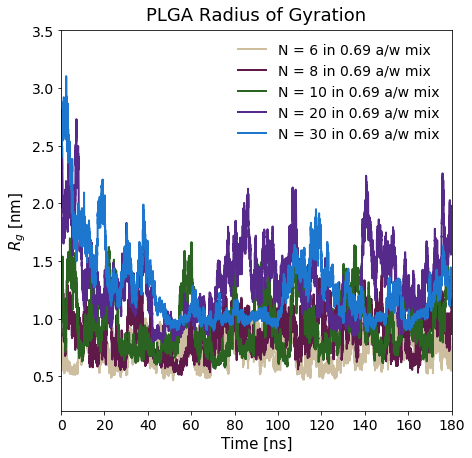

In [211]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_awmix[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_awmix[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_awmix[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_awmix[0]/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, n30plga_rgens_awmix[0]/10,linewidth=2, color='#1D77CF')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix', 'N = 20 in 0.69 a/w mix',
           'N = 30 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3.5)

In [210]:
np.save('n6plga_awmixRg.npy', n6plga_rgens_awmix[0])
np.save('n8plga_awmixRg.npy', n8plga_rgens_awmix[0])
np.save('n10plga_awmixRg.npy', n10plga_rgens_awmix[0])
np.save('n20plga_awmixRg.npy', n20plga_rgens_awmix[0])
np.save('n30plga_awmixRg.npy', n30plga_rgens_awmix[0])

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 30 PLGA/0.69 mol acetone/water system

In [174]:
# x values
blen_n30awmix = cor_n30plga_awmix[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n30awmix

array([  0.        ,   5.81312098,  11.62624196,  17.43936293,
        23.25248391,  29.06560489,  34.87872587,  40.69184685,
        46.50496782,  52.3180888 ,  58.13120978,  63.94433076,
        69.75745174,  75.57057272,  81.38369369,  87.19681467,
        93.00993565,  98.82305663, 104.63617761, 110.44929858,
       116.26241956, 122.07554054, 127.88866152, 133.7017825 ,
       139.51490347, 145.32802445, 151.14114543, 156.95426641,
       162.76738739])

In [175]:
mk_n30p_awmix = cor_n30plga_awmix[1]/cor_n30plga_awmix[0]
mk_n30p_awmix

array([4.68111129e-18, 2.63308683e-02, 8.58010596e-02, 1.58485687e-01,
       2.57430710e-01, 3.54892395e-01, 4.42135290e-01, 6.83511969e-01,
       1.03721064e+00, 1.28024829e+00, 1.05345087e+00, 7.74426972e-01,
       6.48251628e-01, 6.07665494e-01, 6.96765625e-01, 8.24871609e-01,
       1.05322951e+00, 1.30377863e+00, 1.32641116e+00, 1.10230218e+00,
       1.12401565e+00, 1.32760833e+00, 1.87205286e+00, 2.02262924e+00,
       2.39907265e+00, 4.13042700e+00, 3.09553827e+00, 2.22045364e+00,
       2.66830122e+00])

<ErrorbarContainer object of 3 artists>

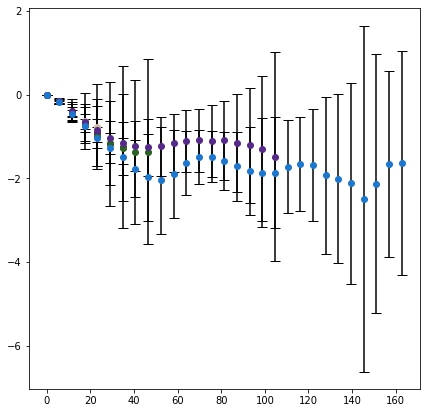

In [176]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10plga_awmix[0]), yerr=mk_n10p_awmix, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20plga_awmix[0]), yerr=mk_n20p_awmix, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30awmix, np.log(cor_n30plga_awmix[0]), yerr=mk_n30p_awmix, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [177]:
# All the points give the best fits for N = 6 peg in water
n30_blksplga_awmix , n30plga_lpawmix = bavg_pers_cnt(5, plga_n30awmix, n30_plga_awmix, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 30.50173181555503
Error in Lp from fit [Angstroms]: 0.0031953169223501764
6000
9000
Lp [Angstroms]: 21.83707619597313
Error in Lp from fit [Angstroms], 95% CL : 0.1070238352262092
R2 score: 0.9912162937193185
9000
12000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 24.57119652496883
Error in Lp from fit [Angstroms]: 0.004085180572055218
12000
15000
Lp [Angstroms]: 22.01328646966707
Error in Lp from fit [Angstroms], 95% CL : 0.15682871335372997
R2 score: 0.982409864539327
15000
18000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 24.364050169006553
Error in Lp from fit [Angstroms]: 0.003117973018703047


In [178]:
n30_blksplga_awmix

{'Avg Radius of gyration': array([12.00400366, 10.24797701, 12.82742184, 11.31499957, 11.53467111]),
 'Avg persistence length': array([30.50173182, 21.8370762 , 24.57119652, 22.01328647, 24.36405017])}

In [179]:
n30plga_lpawmix

array([[ 3.05017318e+01,  2.18370762e+01,  2.45711965e+01,
         2.20132865e+01,  2.43640502e+01],
       [ 3.19531692e-03,  1.07023835e-01,  4.08518057e-03,
         1.56828713e-01,  3.11797302e-03],
       [ 0.00000000e+00, -4.57936764e-02,  0.00000000e+00,
        -4.54271106e-02,  0.00000000e+00],
       [ 0.00000000e+00,  1.37036221e-03,  0.00000000e+00,
         2.84946895e-03,  0.00000000e+00]])

In [243]:
n30plga_lpawmix[2]

array([ 0.        , -0.04579368,  0.        , -0.04542711,  0.        ])

In [241]:
np.mean(n30plga_lpawmix[2])

-0.018244157400232875

In [238]:
np.array([n30plga_lpawmix[2][1],n30plga_lpawmix[2][3]])

array([-0.04579368, -0.04542711])

In [240]:
n30_avg_mslope = np.mean(np.array([n30plga_lpawmix[2][1],n30plga_lpawmix[2][3]]))
n30_avg_mslope

-0.045610393500582186

In [181]:
np.mean(n30plga_lpawmix[3])

0.0008439662318890388

In [182]:
blen_n30awmix

array([  0.        ,   5.81312098,  11.62624196,  17.43936293,
        23.25248391,  29.06560489,  34.87872587,  40.69184685,
        46.50496782,  52.3180888 ,  58.13120978,  63.94433076,
        69.75745174,  75.57057272,  81.38369369,  87.19681467,
        93.00993565,  98.82305663, 104.63617761, 110.44929858,
       116.26241956, 122.07554054, 127.88866152, 133.7017825 ,
       139.51490347, 145.32802445, 151.14114543, 156.95426641,
       162.76738739])

In [244]:
gg_n30plga_awmix = line_fit(n30_avg_mslope,blen_n30awmix)

In [184]:
gg_n6plga_n30awmix = line_fit(np.mean(n6plga_lpawmix[2]),blen_n30awmix)

In [185]:
gg_n8plga_n30awmix = line_fit(np.mean(n8plga_lpawmix[2]),blen_n30awmix)

In [186]:
gg_n10plga_n30awmix = line_fit(np.mean(n10plga_lpawmix[2]),blen_n30awmix)

In [247]:
gg_n20plga_n30awmix = line_fit(n20_avg_mslope,blen_n30awmix)

In [248]:
gg_n30plga_awmix

array([-0.        , -0.26513874, -0.53027747, -0.79541621, -1.06055494,
       -1.32569368, -1.59083241, -1.85597115, -2.12110988, -2.38624862,
       -2.65138735, -2.91652609, -3.18166482, -3.44680356, -3.71194229,
       -3.97708103, -4.24221976, -4.5073585 , -4.77249723, -5.03763597,
       -5.30277471, -5.56791344, -5.83305218, -6.09819091, -6.36332965,
       -6.62846838, -6.89360712, -7.15874585, -7.42388459])

In [215]:
gg_n20plga_n30awmix

array([-0.        , -0.12374474, -0.24748948, -0.37123423, -0.49497897,
       -0.61872371, -0.74246845, -0.8662132 , -0.98995794, -1.11370268,
       -1.23744742, -1.36119217, -1.48493691, -1.60868165, -1.73242639,
       -1.85617114, -1.97991588, -2.10366062, -2.22740536, -2.35115011,
       -2.47489485, -2.59863959, -2.72238433, -2.84612908, -2.96987382,
       -3.09361856, -3.2173633 , -3.34110805, -3.46485279])

### Block averaged Radius of gyration and persistence length, N = 30 PLGA/0.69 mol acetone/water system

In [189]:
np.mean(n30_blksplga_awmix["Avg persistence length"])

24.657468235034123

In [190]:
np.std(n30_blksplga_awmix["Avg persistence length"])

3.1367263900547733

In [191]:
np.mean(n30_blksplga_awmix["Avg Radius of gyration"])

11.585814635685233

In [192]:
np.std(n30_blksplga_awmix["Avg Radius of gyration"])

0.8464320980442758

In [193]:
rgplga_olig_awmix[r"$R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix"] = n30_blksplga_awmix["Avg Radius of gyration"]
rgplga_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix
0,7.414166,7.815941,8.517919,10.748443,12.004004
1,7.660967,8.576357,8.260516,13.252983,10.247977
2,7.277628,9.197118,10.288552,14.037639,12.827422
3,7.017058,9.769339,9.598804,12.722609,11.315000
4,8.123287,8.662676,9.886560,13.682629,11.534671


In [194]:
pers_plgat_awmix[r"$L_{p}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix"] = n30_blksplga_awmix["Avg persistence length"]
pers_plgat_awmix

,$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix
0,31.843280,18.143705,18.415307,28.177639,30.501732
1,32.793833,26.608497,16.321849,31.988147,21.837076
2,28.551544,33.523854,29.365548,35.004533,24.571197
3,25.689959,36.492615,23.457535,26.999779,22.013286
4,46.557976,29.377310,32.176044,26.221393,24.364050


In [251]:
rgplga_olig_awmix.to_pickle("PLGA_awmix_Rg.pkl")
pers_plgat_awmix.to_pickle("PLGA_awmix_Lp.pkl")

Text(0.5, -5.3, '$N_{PLGA}$ = 30: $L_{p}$ = 24.7 $\\AA$ ± 3.14 $\\AA$')

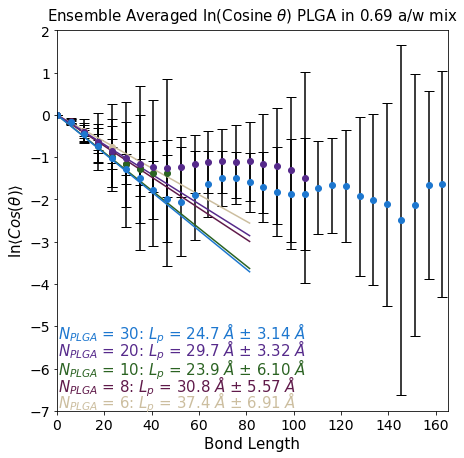

In [250]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6plga_awmix[0]), yerr=mk_n6p_awmix, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8plga_awmix[0]), yerr=mk_n8p_awmix, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10plga_awmix[0]), yerr=mk_n10p_awmix, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20plga_awmix[0]), yerr=mk_n20p_awmix, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30awmix, np.log(cor_n30plga_awmix[0]), yerr=mk_n30p_awmix, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30awmix[:15], gg_n6plga_n30awmix[:15], color='#CCBE9F')
plt.plot(blen_n30awmix[:15], gg_n8plga_n30awmix[:15], color='#601A4A')
plt.plot(blen_n30awmix[:15], gg_n10plga_n30awmix[:15], color='#2B6322')
plt.plot(blen_n30awmix[:15], gg_n20plga_n30awmix[:15], color='#562A8B')
plt.plot(blen_n30awmix[:15], gg_n30plga_awmix[:15], color='#1D77CF')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,2)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 37.4 $\AA$ ± 6.91 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.8 $\AA$ ± 5.57 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 23.9 $\AA$ ± 6.10 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 29.7 $\AA$ ± 3.32 $\AA$', fontsize=15, color='#562A8B')
plt.text(0.5, -5.30,r'$N_{PLGA}$ = 30: $L_{p}$ = 24.7 $\AA$ ± 3.14 $\AA$', fontsize=15, color='#1D77CF')

In [ ]:
rgplga_olig_awmix.to_pickle("PLGA_awmix_Rg.pkl")

In [ ]:
pers_plgat_awmix.to_pickle("PLGA_awmix_Lp.pkl")

### Fluory Exponent, PLGA/0.69 mol acetone/water system

In [196]:
n_plga = np.array([6,8,10,20,30])
rg_nplga_awmix = np.array([np.mean(n6_blksplga_awmix["Avg Radius of gyration"])
                    ,np.mean(n8_blksplga_awmix["Avg Radius of gyration"]),np.mean(n10_blksplga_awmix["Avg Radius of gyration"])
                    ,np.mean(n20_blksplga_awmix["Avg Radius of gyration"]),np.mean(n30_blksplga_awmix["Avg Radius of gyration"])])

In [197]:
rg_nplga_awmix

array([ 7.49862124,  8.80428612,  9.31047036, 12.88886031, 11.58581464])

In [198]:
rgawmix_nplga_std = np.array([np.std(np.log10(n6_blksplga_awmix["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blksplga_awmix["Avg Radius of gyration"]))
                        ,np.std(np.log10(n10_blksplga_awmix["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blksplga_awmix["Avg Radius of gyration"]))
                        ,np.std(np.log10(n30_blksplga_awmix["Avg Radius of gyration"]))])
rgawmix_nplga_std

array([0.02152494, 0.0323918 , 0.03719691, 0.04105965, 0.03204338])

In [199]:
n_plga

array([ 6,  8, 10, 20, 30])

In [200]:
np.log10(rg_nplga_awmix)

array([0.87498142, 0.94469415, 0.96897162, 1.11021452, 1.06392658])

In [201]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [202]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vpawmix = LinearRegression(fit_intercept=True)
model_vpawmix.fit(np.log10(n_plga).reshape(-1,1), np.log10(rg_nplga_awmix))
# Slope here is in nanometers
print("Model slope:    ", model_vpawmix.coef_[0])
print("Model intercept:", model_vpawmix.intercept_)

Model slope:     0.299382378722663
Model intercept: 0.6656684741465118


In [203]:
gg_awmix = model_vpawmix.predict(np.log10(n_plga.reshape(-1,1)))
gg_awmix

array([0.89863325, 0.9360377 , 0.96505085, 1.05517393, 1.10789255])

In [204]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_nplga_awmix), gg_awmix))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_nplga_awmix), gg_awmix))

Mean Std Error: 0.0011224377137726586
R2 score: 0.8423898833906188


In [205]:
# Residuals between the true y data and model y data 
resid_vawmix = np.log10(rg_nplga_awmix) - gg_awmix
resid_vawmix

array([-0.02365183,  0.00865645,  0.00392077,  0.05504059, -0.04396597])

In [206]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttawmix = np.log10(n_plga)
nt_ttawmix -= np.mean(nt_ttawmix)
nhui_awmix = nt_ttawmix**2
np.sum(nhui_awmix)

0.334663876760361

In [207]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [208]:
# How to calculate 95% confidence interval for the slope 
flc_vawmix = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vawmix**2)/len(resid_vawmix))/(np.sum(nhui_awmix)))
flc_vawmix

0.16079250368765927

Text(1.1, 0.95, '$v_{acetone-water}$ = 0.30 ± 0.16')

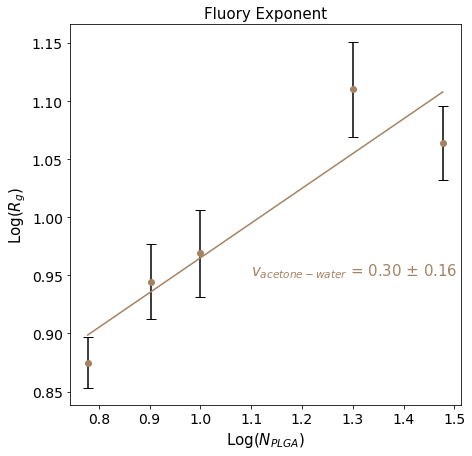

In [212]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_plga), np.log10(rg_nplga_awmix), yerr=rgawmix_nplga_std, color='#A58262', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_plga), gg_awmix, color='#A58262')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PLGA}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.95, r'$v_{acetone-water}$ = 0.30 ± 0.16', fontsize=15, color='#A58262')